In [ ]:
pip install scipy

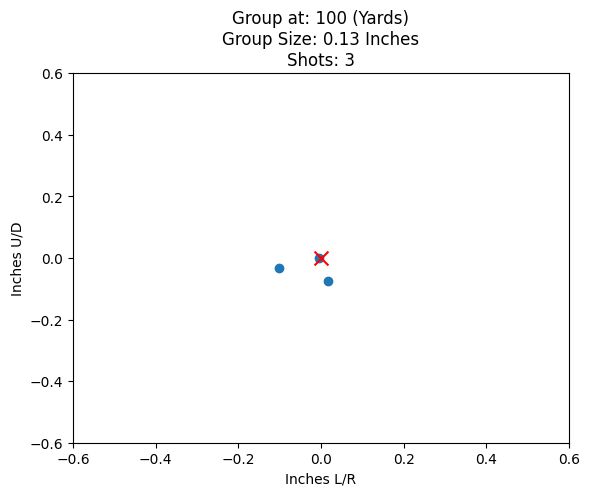

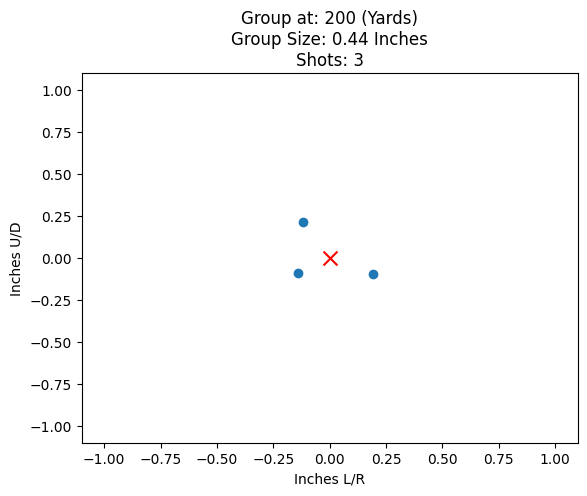

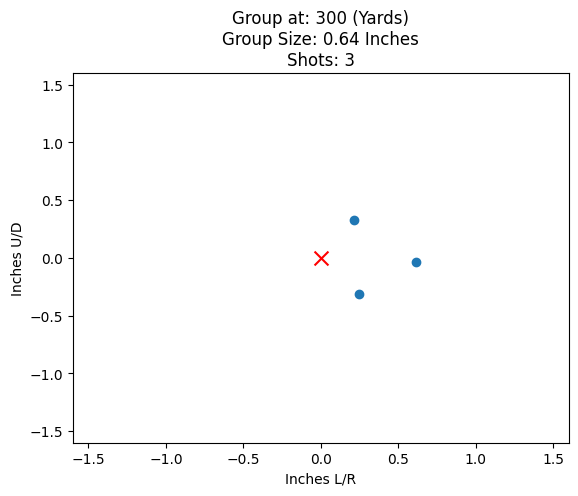

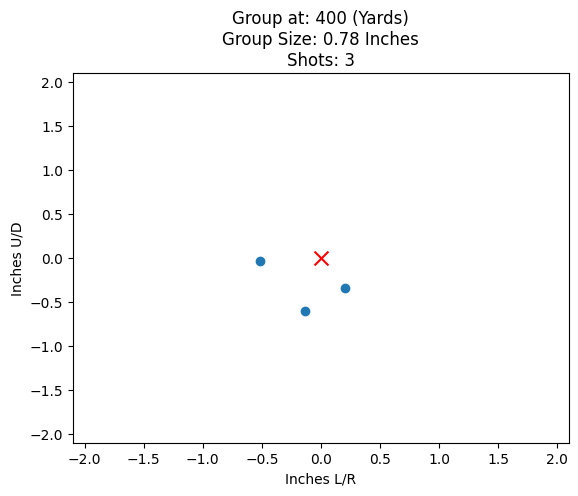

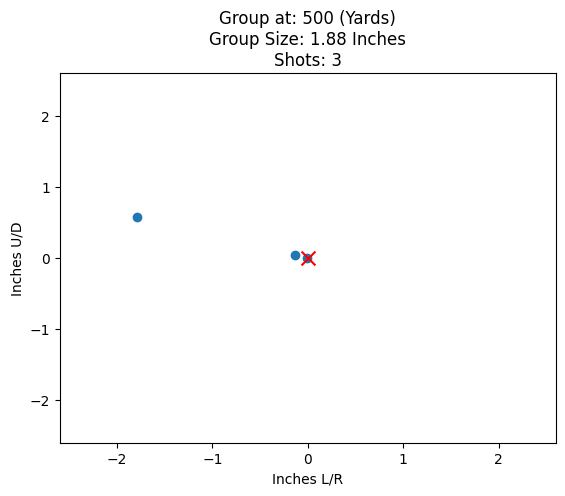

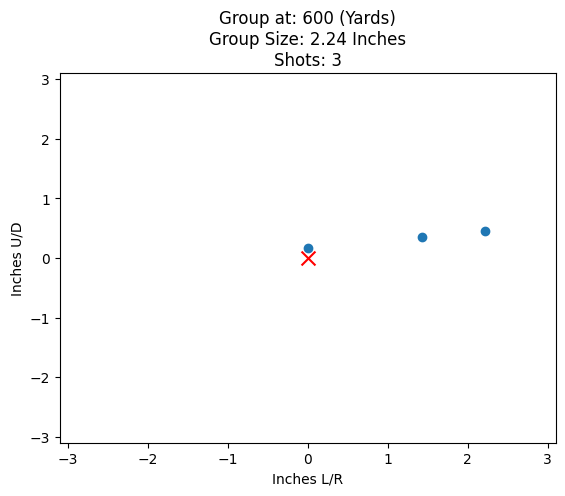

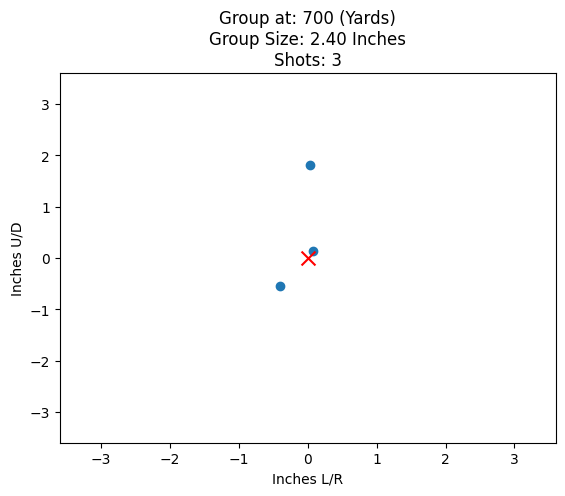

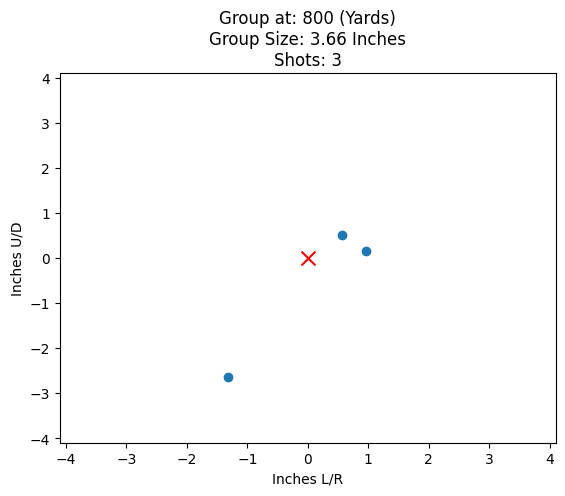

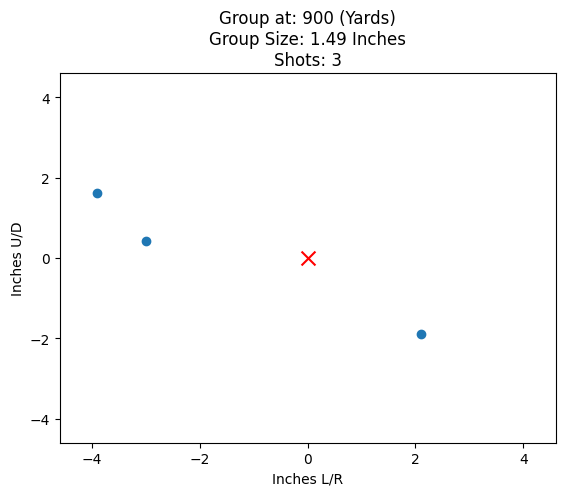

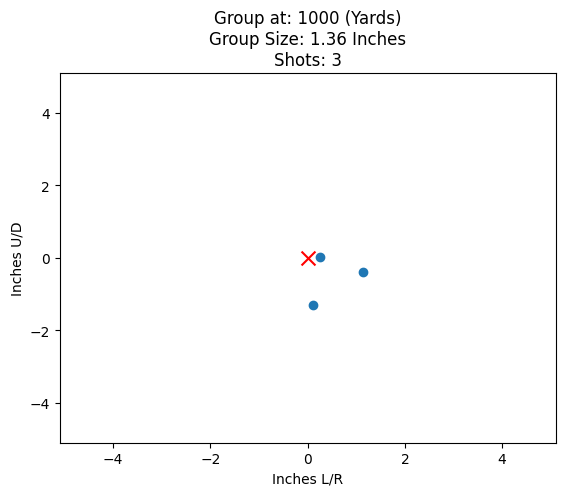

In [6]:
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import truncnorm  # Import truncnorm function from scipy.stats

shots = 3
m = 0.5
y = range(1, 11)
increment = 100
scale_factor = 0.5  # Adjust this to control the spread of points

def generate_random_points(num_points, radius):
    """Generates random points within a circle centered at (0, 0) with the given radius.

    Args:
        num_points: The number of points to generate.
        radius: The radius of the circle.

    Returns:
        A list of tuples representing the (x, y) coordinates of the generated points.
    """

    points = []
    for _ in range(num_points):
        # Generate a random angle between 0 and 2*pi
        theta = random.uniform(0, 2 * math.pi)

        # Generate a random distance from the center using truncated normal distribution
        a = 0  # Lower bound
        b = radius  # Upper bound
        distance = truncnorm.rvs(a, b, loc=0, scale=radius * scale_factor)

        # Calculate the x and y coordinates
        x = distance * math.cos(theta)
        y = distance * math.sin(theta)

        points.append((x, y))

    return points


# Generate 10 variations of the points
for i in y:
    radius = m * i
    points = generate_random_points(shots, radius)
    yards = i * increment
    # Find the farthest points by checking if the distance between any two points exceeds the radius
    max_distance = 0
    for p1 in points:
        for p2 in points:
            if p1 != p2:  # Avoid comparing a point to itself
                dist = math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
                if dist > max_distance and dist <= radius:  # Ensure distance is within the radius
                    max_distance = dist

    # Extract x and y coordinates
    x_coords, y_coords = zip(*points)

    # Create a scatter plot
    plt.figure(i)
    plt.scatter(x_coords, y_coords)

    # Add a red point at (0, 0)
    plt.scatter(0, 0, color='red', marker='x', s=100)

    # Set the title and axis labels
    plt.title(f"Group at: {yards} (Yards)\nGroup Size: {max_distance:.2f} Inches\nShots: {shots}")
    plt.xlabel("Inches L/R")
    plt.ylabel("Inches U/D")

    # Set the limits for the x and y axes
    plt.xlim(-radius - 0.1, radius + 0.1)
    plt.ylim(-radius - 0.1, radius + 0.1)

    # Show the plot
    plt.show()